# Can I too be a youth?

In [1]:
import uproot as ur
import uproot_methods as urm

In [2]:
import numpy as np

First thing: open up the ntuple, make sure we have it loaded

In [3]:
sm_file = ur.open("../user.jagrundy.20736236._000001.MiniNTuple.root")
sm_tree = sm_file['XhhMiniNtuple']

In [4]:
print(sm_tree)

<TTree b'XhhMiniNtuple' at 0x7f72c01b5550>


What branches are available?

In [5]:
sm_tree.keys()

[b'runNumber',
 b'eventNumber',
 b'lumiBlock',
 b'coreFlags',
 b'bcid',
 b'mcEventNumber',
 b'mcChannelNumber',
 b'mcEventWeight',
 b'NPV',
 b'actualInteractionsPerCrossing',
 b'averageInteractionsPerCrossing',
 b'weight_pileup',
 b'correctedAverageMu',
 b'correctedAndScaledAverageMu',
 b'correctedActualMu',
 b'correctedAndScaledActualMu',
 b'rand_run_nr',
 b'rand_lumiblock_nr',
 b'passedTriggerHashes',
 b'nresolvedJets',
 b'resolvedJets_E',
 b'resolvedJets_pt',
 b'resolvedJets_phi',
 b'resolvedJets_eta',
 b'resolvedJets_NumTrkPt1000PV',
 b'resolvedJets_SumPtTrkPt1000PV',
 b'resolvedJets_TrackWidthPt1000PV',
 b'resolvedJets_NumTrkPt500PV',
 b'resolvedJets_SumPtTrkPt500PV',
 b'resolvedJets_TrackWidthPt500PV',
 b'resolvedJets_JVFPV',
 b'resolvedJets_JvtJvfcorr',
 b'resolvedJets_JvtRpt',
 b'resolvedJets_Jvt',
 b'resolvedJets_JvtPass_Loose',
 b'resolvedJets_JvtEff_SF_Loose',
 b'resolvedJets_JvtPass_Medium',
 b'resolvedJets_JvtEff_SF_Medium',
 b'resolvedJets_JvtPass_Tight',
 b'resolvedJets_

For messing around, let's load some branches directly into memory

In [6]:
blabel = sm_tree.array('resolvedJets_HadronConeExclTruthLabelID')

In [7]:
btag = sm_tree.array('resolvedJets_is_DL1r_FixedCutBEff_77')

In [8]:
pt  = sm_tree.array('resolvedJets_pt')
eta = sm_tree.array('resolvedJets_eta')
phi = sm_tree.array('resolvedJets_phi')
eng = sm_tree.array('resolvedJets_E')

In [9]:
print(pt)

[[65.84481 56.41042 55.58111 52.658108] [252.58774 231.31273 71.11422 39.82197] [141.73459 119.38843 108.97492 96.425415 92.03795 35.65527] ... [134.19188 132.13402 119.811325 ... 68.958206 35.435337 33.936848] [947.01624 946.58844] [314.1144 215.53065 180.72496 ... 50.937775 47.17058 27.418373]]


Let's see if the jet pT's are ordered? Verdict: they're not :( (this is fixed in later version of this data but I don't have it available yet)

In [10]:
for ie, event in enumerate(pt):
    for ij, jetpt in enumerate(event):
        if ij == 0:
            continue
        if jetpt > event[ij-1]:
            print('jetpt {} {} greater than {} {} in event {}'.format(jetpt, ij, event[ij-1], ij-1, ie))

pt 84.57231903076172 4 greater than 76.9062728881836 3 in event 775849
jetpt 1550.4180908203125 1 greater than 1543.0103759765625 0 in event 775860
jetpt 41.55514907836914 6 greater than 40.260135650634766 5 in event 775868
jetpt 128.63279724121094 1 greater than 128.46401977539062 0 in event 775873
jetpt 191.06112670898438 1 greater than 189.94427490234375 0 in event 775878
jetpt 133.0551300048828 4 greater than 97.50000762939453 3 in event 775891
jetpt 134.3517303466797 1 greater than 133.49794006347656 0 in event 775892
jetpt 109.62370300292969 5 greater than 37.98640441894531 4 in event 775901
jetpt 61.087955474853516 2 greater than 58.950599670410156 1 in event 775905
jetpt 189.85235595703125 2 greater than 181.96304321289062 1 in event 775908
jetpt 141.2115936279297 2 greater than 122.12258911132812 1 in event 775909
jetpt 78.93925476074219 2 greater than 78.11874389648438 1 in event 775910
jetpt 194.274169921875 4 greater than 121.95335388183594 3 in event 775911
jetpt 107.05075

A particular event that is not-ordered: can see jet 0 and jet 1 are out of rder

In [11]:
print(pt[88774])

[125.18986  158.46048   48.927692  26.359621]


Another way of loading the data: into a numpy array by name

In [12]:
branches = sm_tree.arrays(branches=['resolvedJets_pt', 'resolvedJets_eta', 'resolvedJets_phi', 'resolvedJets_E', 'resolvedJets_HadronConeExclTruthLabelID', 'resolvedJets_is_DL1r_FixedCutBEff_77'], namedecode='utf-8')

In [13]:
print(branches)

{'resolvedJets_pt': <JaggedArray [[65.84481 56.41042 55.58111 52.658108] [252.58774 231.31273 71.11422 39.82197] [141.73459 119.38843 108.97492 96.425415 92.03795 35.65527] ... [134.19188 132.13402 119.811325 ... 68.958206 35.435337 33.936848] [947.01624 946.58844] [314.1144 215.53065 180.72496 ... 50.937775 47.17058 27.418373]] at 0x7f722c1ee3d0>, 'resolvedJets_eta': <JaggedArray [[0.14644603 1.6808231 2.3661427 0.7512548] [0.840473 -0.05792042 0.72992915 1.3252562] [-1.1144592 -0.21567057 -1.0860054 0.40170872 -0.8294705 4.129258] ... [2.1901886 1.3685735 0.8739441 ... -0.528523 -1.3469274 -0.3179609] [0.31163636 -0.79126656] [-1.9547803 -1.2735919 -2.1737745 ... -1.6820729 -2.4373848 0.7288418]] at 0x7f722c1eeb20>, 'resolvedJets_phi': <JaggedArray [[2.4678905 -1.0688465 0.85040945 -2.326935] [-1.9642147 1.2621683 -1.175143 -1.5388302] [0.41596937 -2.1853056 -2.3696995 2.3505852 1.4401845 -1.7791629] ... [0.64271003 0.7609542 3.0049891 ... -2.5440443 -2.3449247 -1.384469] [-2.2180173

Now we can put them into an awkard.Table, which is like a Pandas frame

In [14]:
import awkward
table = awkward.Table(branches)

In [15]:
print(table)

[<Row 0> <Row 1> <Row 2> ... <Row 777147> <Row 777148> <Row 777149>]


This is a trick from uproot methods: you can make a TLorentzVector type object directly from the four branches that specify the pt/eta/phi/e like this

In [16]:
lv = urm.TLorentzVectorArray.from_ptetaphie(table['resolvedJets_pt'],
                                            table['resolvedJets_eta'],
                                            table['resolvedJets_phi'],
                                            table['resolvedJets_E'])

Now this is a trick to sort the 4-vectors. the .pt.argsort() gives us a list of indices, per event, that sorts the jets. You can just apply this to the table, and it'll sort elements by that. So we're going to make a new table (s_table, for sorted) that copies over relevant information and sorts via the [indices] trick.

In [17]:
table['resolved_lv'] = lv

In [18]:
indices = table['resolved_lv'].pt.argsort()

In [19]:
s_table = awkward.Table()

In [20]:
s_table['resolved_lv'] = table['resolved_lv'][indices]

In [21]:
s_table['resolvedJets_HadronConeExclTruthLabelID'] = table['resolvedJets_HadronConeExclTruthLabelID'][indices]

In [22]:
s_table['resolvedJets_is_DL1r_FixedCutBEff_77'] = table['resolvedJets_is_DL1r_FixedCutBEff_77'][indices]

And here we see that our old problem child event is properly sorted.

In [23]:
s_table[88774]['resolved_lv'].pt

array([158.46048 , 125.18985 ,  48.927692,  26.359621], dtype=float32)

Define some convenience columns here, for number of various things in the dataset

In [24]:
s_table['nbjets'] = awkward.AwkwardArray.count_nonzero(s_table['resolvedJets_HadronConeExclTruthLabelID']==5)
s_table['nbtags'] = awkward.AwkwardArray.count_nonzero(s_table['resolvedJets_is_DL1r_FixedCutBEff_77']==1)
s_table['nfour'] = awkward.AwkwardArray.count_nonzero(s_table['resolvedJets_HadronConeExclTruthLabelID']==4)
s_table['nfourteen'] = awkward.AwkwardArray.count_nonzero(s_table['resolvedJets_HadronConeExclTruthLabelID']==14)
s_table['nfifteen'] = awkward.AwkwardArray.count_nonzero(s_table['resolvedJets_HadronConeExclTruthLabelID']==15)


Let's make some quick plots to understand what's going on.

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

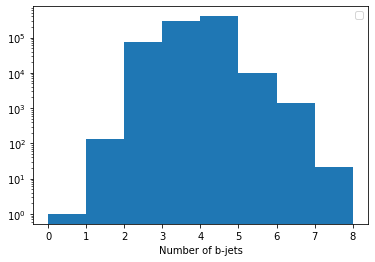

In [26]:
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(s_table.nbjets, bins=8)
plt.yscale('log')
plt.xlabel('Number of b-jets')
plt.legend()
plt.show()

Define some filters. We can do this by logical requirements on the bjets and btags.

In [27]:
nb4 = s_table.nbjets==4
nb3 = s_table.nbjets==3
nt4 = s_table.nbtags==4
nt3 = s_table.nbtags==3
nb4nt3 = nb4 & nt3 & (s_table.nfour==0) & (s_table.nfourteen==0) & (s_table.nfifteen==0)

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

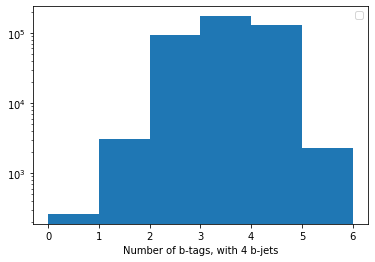

In [28]:
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(s_table[nb4].nbtags, bins=6)
plt.yscale('log')
plt.xlabel('Number of b-tags, with 4 b-jets')
plt.legend()
plt.show()

In [29]:
len(s_table[nb4nt3])

163640

In [30]:
s_table['resolvedJets_HadronConeExclTruthLabelID'][nb4nt3]

<JaggedArray [[5 5 5 5 0] [5 5 5 ... 0 0 0] [0 5 5 5 5 0] ... [5 5 0 ... 5 0 0] [5 5 5 ... 0 0 5] [5 0 5 ... 5 0 0]] at 0x7f72d91a2880>

In [31]:
s_table['resolvedJets_is_DL1r_FixedCutBEff_77'][nb4nt3]

<JaggedArray [[0 1 1 1 0] [1 1 1 ... 0 0 0] [0 1 0 1 1 0] ... [1 1 0 ... 0 0 0] [1 1 1 ... 0 0 0] [1 0 1 ... 0 0 0]] at 0x7f720b43b160>

What's the maximum number of jets we have in an event? 18, wow

In [32]:
np.max(awkward.AwkwardArray.count(s_table['resolvedJets_is_DL1r_FixedCutBEff_77']))

18

Let's just filter this down to 10... the syntax is like this

In [33]:
s_table['resolvedJets_HadronConeExclTruthLabelID'][:10]

<JaggedArray [[5 0 5 5] [5 5 0 5] [5 5 5 0 5 0] ... [5 5 0 5] [5 5 0 5 0] [5 5 5 0]] at 0x7f720b361e50>

Here's a plot of the number of jets, justifying that truncation as maybe being ok

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

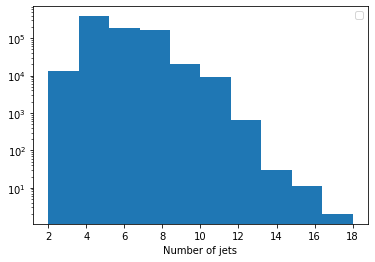

In [34]:
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(awkward.AwkwardArray.count(s_table['resolvedJets_is_DL1r_FixedCutBEff_77']))
plt.yscale('log')
plt.xlabel('Number of jets')
plt.legend()
plt.show()

truncate to 10? probably ok

# Here be ML dragons, where code remains a bit uglier than I would like!

In [35]:
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [36]:
padded_true = pad_sequences(s_table['resolvedJets_HadronConeExclTruthLabelID'][nb4nt3], padding='post')[:,:10]
padded_tag  = pad_sequences(s_table['resolvedJets_is_DL1r_FixedCutBEff_77'][nb4nt3], padding='post')[:,:10]
padded_pt   = pad_sequences(s_table['resolved_lv'][nb4nt3].pt, padding='post', dtype='float32', value = -10)[:,:10]
padded_eta  = pad_sequences(s_table['resolved_lv'][nb4nt3].eta, padding='post', dtype='float32', value = -10)[:,:10]
padded_phi  = pad_sequences(s_table['resolved_lv'][nb4nt3].phi, padding='post', dtype='float32', value = -10)[:,:10]


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

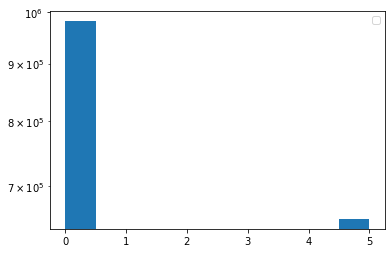

In [37]:
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(padded_true.flatten())
plt.yscale('log')
# plt.xlabel('Learned - Actual Energy')
plt.legend()
plt.show()

In [38]:
print(padded_true[:10])

[[5 5 5 5 0 0 0 0 0 0]
 [5 5 5 5 0 0 0 0 0 0]
 [0 5 5 5 5 0 0 0 0 0]
 [5 0 5 5 5 0 0 0 0 0]
 [5 0 5 5 5 0 0 0 0 0]
 [5 5 0 0 5 0 5 0 0 0]
 [5 5 5 0 5 0 0 0 0 0]
 [5 5 5 5 0 0 0 0 0 0]
 [5 5 5 0 0 5 0 0 0 0]
 [5 5 5 5 0 0 0 0 0 0]]


In [39]:
print(padded_tag[:10])

[[0 1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [0 1 0 1 1 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 0 0 0]
 [1 1 0 0 1 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [1 1 0 0 0 1 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0]]


In [40]:
true_tag_diff = np.count_nonzero(np.logical_xor(padded_true, padded_tag),axis=1)

In [41]:
print(padded_true[true_tag_diff > 1])
print(padded_tag[true_tag_diff > 1])

[[5 5 0 ... 5 0 0]
 [5 5 5 ... 0 0 0]
 [5 5 0 ... 0 0 0]
 ...
 [5 0 5 ... 0 0 0]
 [5 5 5 ... 0 0 0]
 [5 5 5 ... 0 0 0]]
[[1 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]]


In [42]:
pc_pt = padded_pt[true_tag_diff == 1]
pc_eta = padded_eta[true_tag_diff == 1]
pc_phi = padded_phi[true_tag_diff == 1]

In [43]:
pc_missedjet = np.logical_xor(padded_true, padded_tag)[true_tag_diff == 1].astype(int)

I think missed jet is already one-hot encoded basically? nice.

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler_pt = StandardScaler()
scaler_eta = StandardScaler()
scaler_phi = StandardScaler()

In [46]:
s_pc_pt = scaler_pt.fit_transform(pc_pt)
s_pc_eta = scaler_eta.fit_transform(pc_eta)
s_pc_phi = scaler_phi.fit_transform(pc_phi)

In [47]:
from sklearn.model_selection import ShuffleSplit
def splitTVT(input, trainfrac = 0.8, testfrac = 0.2):
    valfrac = 1.0 - trainfrac - testfrac
    
    train_split = ShuffleSplit(n_splits=1, test_size=testfrac + valfrac, random_state=0)
    # advance the generator once with the next function
    train_index, testval_index = next(train_split.split(input))  

    if valfrac > 0:
        testval_split = ShuffleSplit(
            n_splits=1, test_size=valfrac / (valfrac+testfrac), random_state=0)
        test_index, val_index = next(testval_split.split(testval_index)) 
    else:
        test_index = testval_index
        val_index = []

    return train_index, val_index, test_index

In [48]:
train, val, test = splitTVT(pc_missedjet, trainfrac=0.7, testfrac=0.2)

In [49]:
s_pc_in = np.column_stack((s_pc_pt, s_pc_eta, s_pc_phi))

In [50]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Dropout

In [51]:
model = Sequential()
model.add(Dense(30, input_dim=30, kernel_initializer='normal', activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(30, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(15, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))
        # compile model
optimizer = Adam(lr=5e-5)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                160       
Total params: 2,485
Trainable params: 2,485
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(s_pc_in[train], pc_missedjet[train], validation_data=(s_pc_in[val], pc_missedjet[val]), epochs = 200, batch_size = 200, verbose = 1)

=====================] - 1s 7us/step - loss: 1.7107 - acc: 0.2340 - val_loss: 1.7082 - val_acc: 0.2355
Epoch 60/200
114035/114035 [==============================] - 1s 7us/step - loss: 1.7106 - acc: 0.2338 - val_loss: 1.7082 - val_acc: 0.2350
Epoch 61/200
114035/114035 [==============================] - 1s 7us/step - loss: 1.7104 - acc: 0.2348 - val_loss: 1.7076 - val_acc: 0.2361
Epoch 62/200
114035/114035 [==============================] - 1s 7us/step - loss: 1.7104 - acc: 0.2338 - val_loss: 1.7073 - val_acc: 0.2367
Epoch 63/200
114035/114035 [==============================] - 1s 7us/step - loss: 1.7102 - acc: 0.2356 - val_loss: 1.7072 - val_acc: 0.2364
Epoch 64/200
114035/114035 [==============================] - 1s 8us/step - loss: 1.7100 - acc: 0.2344 - val_loss: 1.7072 - val_acc: 0.2357
Epoch 65/200
114035/114035 [==============================] - 1s 8us/step - loss: 1.7099 - acc: 0.2350 - val_loss: 1.7071 - val_acc: 0.2362
Epoch 66/200
114035/114035 [=============================

<Figure size 432x288 with 0 Axes>

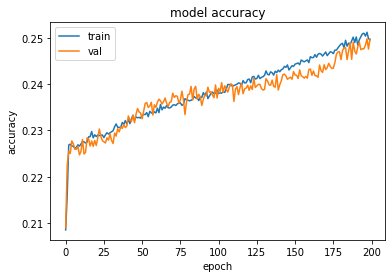

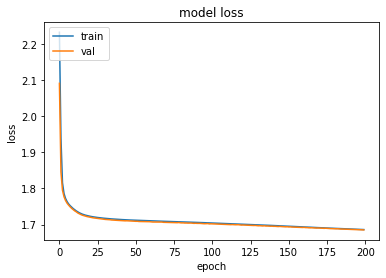

In [54]:
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.savefig('Plots/accuracy_{}.pdf'.format(layer_name))
plt.show()


    # summarize history for loss
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.savefig('Plots/loss_{}.pdf'.format(layer_name))
plt.show()


In [55]:
nn_score = model.predict(s_pc_in)

In [74]:
print(nn_score[test][:10])

[[2.24549159e-01 1.68576702e-01 1.28083080e-01 1.32272229e-01
  1.55016154e-01 1.12403333e-01 7.89332688e-02 1.66015117e-04
  2.07017251e-11 5.79599023e-24]
 [1.48413107e-01 1.62239999e-01 1.94175571e-01 2.22450718e-01
  2.72641897e-01 7.86915916e-05 8.43217496e-10 4.53068919e-12
  3.65817560e-24 0.00000000e+00]
 [1.66122824e-01 1.32271156e-01 1.63105816e-01 5.37846148e-01
  6.54043222e-04 4.07535445e-08 1.91330868e-14 1.30901345e-10
  8.78153964e-24 0.00000000e+00]
 [1.52359799e-01 1.58295304e-01 1.53071165e-01 1.81109503e-01
  1.31975517e-01 1.37842610e-01 8.48723054e-02 4.73812310e-04
  1.16000667e-10 3.67753644e-19]
 [3.14687192e-01 2.13848963e-01 1.68635681e-01 2.48475298e-01
  5.43498173e-02 3.02144167e-06 1.07327680e-11 1.24965264e-11
  7.65035807e-24 0.00000000e+00]
 [1.76490963e-01 2.33565390e-01 2.50655800e-01 3.39174151e-01
  1.13698356e-04 9.89341054e-10 5.47712084e-17 1.12062226e-11
  5.92599757e-25 0.00000000e+00]
 [2.48675391e-01 1.83535337e-01 1.43596113e-01 1.43339425e

In [75]:
print(pc_missedjet[test][:10])

[[1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]]


In [76]:
best_index_asc = nn_score[test].argsort(axis=1)
best_index = best_index_asc[:,::-1]

In [77]:
print(best_index)

[[0 1 4 ... 7 8 9]
 [4 3 2 ... 7 8 9]
 [3 0 2 ... 6 8 9]
 ...
 [1 2 0 ... 6 8 9]
 [1 0 2 ... 7 8 9]
 [5 3 4 ... 7 8 9]]


In [60]:
test_mj = pc_missedjet[test]

In [61]:
s_test_mj = test_mj[np.arange(test_mj.shape[0])[:,None], best_index]

In [62]:
print(s_test_mj)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [63]:
test_nn_score = nn_score[test]

In [64]:
s_test_score = test_nn_score[np.arange(test_nn_score.shape[0])[:,None], best_index]

In [65]:
from keras.utils.np_utils import to_categorical   


In [66]:
max_true = to_categorical(s_test_mj[:,0], num_classes = 2)

In [67]:
max_true = s_test_mj[:,0]

In [68]:
print(max_true)

[1 0 1 ... 0 0 1]


In [69]:
from sklearn.metrics import roc_curve

In [70]:
print(max_true)

[1 0 1 ... 0 0 1]


In [71]:
max_val = s_test_score[:,0]

In [72]:
fpr, tpr, thresholds = roc_curve(max_true, max_val, pos_label=1)

<Figure size 432x288 with 0 Axes>

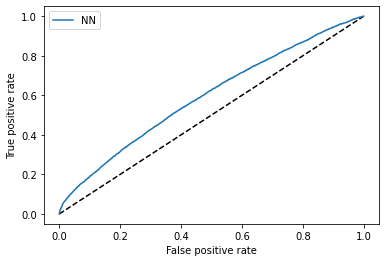

In [73]:
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='NN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
# plt.title('Simple NN ROC curve: classification of $\pi^+$ vs. $\pi^0$')
plt.legend(loc='best')
# plt.savefig('Plots/roc_combine2_cnn.pdf')
plt.show()